In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from Timer import Timer
from file_utils import read_lines_tsv

In [2]:
# Loading dataset from file
    # source: https://graphchallenge.mit.edu/data-sets
    # file_source: https://graphchallenge.s3.amazonaws.com/snap/as20000102/as20000102_adj.tsv
    # file_format: Adjacency TSV (Tab-Separated Values)
        # <dataset-name>_adj.tsv
        # (Row, Col, Value) tuple describing the adjacency matrix of the graph in tab separated format.
        # Adjacency matrix is of size Num_vertices x Num_vertices
    # file: as20000102_adj.tsv (Autonomous Systems graph from January 02 2000)
    # num of nodes:      6.474
    # num of edges:     25.144
    # num of triangles:  6.584

Timer.start()

G = nx.read_edgelist('../datasets/as20000102_adj.tsv', data=(('ajd_value',float),))
print(nx.info(G))

Timer.finish()

Name: 
Type: Graph
Number of nodes: 6474
Number of edges: 12572
Average degree:   3.8838
elapsed time: 0.406457


In [3]:
# Alternative way to build graphs from file
# This will allow to generate random samples of graphs from a list of edges in memory

Timer.start()

lines = read_lines_tsv('../datasets/as20000102_adj.tsv')
G = nx.parse_edgelist(lines, nodetype = int, data=(('ajd_value',float),))
print(nx.info(G))
print(('Number of lines: %s') % len(lines))

Timer.finish()

Name: 
Type: Graph
Number of nodes: 6474
Number of edges: 12572
Average degree:   3.8838
Number of lines: 25144
elapsed time: 0.365965


In [4]:
Timer.start()

print('Number of nodes: ', G.number_of_nodes())
print('Number of edges: ', G.number_of_edges())
# each triangle is counted 3 times then divided by 3
print('Number of triangles: ', int(sum(list(nx.triangles(G).values()))/3))
# clustering coefficient of G
cc = nx.average_clustering(G)
print('Clustering coefficient of G: ', cc)

Timer.finish()

Number of nodes:  6474
Number of edges:  12572
Number of triangles:  6584
Clustering coefficient of G:  0.2522224351161442
elapsed time: 1.404763


In [5]:
# Using samples to build graphs and to calculate 

m, ccGraph, ccSample, ccSubG = [], [], [], []
sampleG, subG = nx.Graph(), nx.Graph()

for i in range(1000, len(lines)+1, 1000):
    Timer.start()
    
    sampleG.clear() # our sample graph
    subG.clear()    # a subgraph from complete graph
    sample = np.random.choice(lines, i, replace=False) # getting edges from list with random choice
    sampleG = nx.parse_edgelist(sample, nodetype = int, data=(('ajd_value',float),))
    # creating a subgraph of G using nodes of the sample graph
    subG = G.subgraph(sampleG.nodes).copy()
    nnSampleG = sampleG.number_of_nodes()
    nnSubG = subG.number_of_nodes()
    m.append(nnSampleG)
    ccGraph.append(cc) # clustering coefficient of entire graph G
    ccSample.append(nx.average_clustering(sampleG))
    ccSubG.append(nx.average_clustering(subG))
    
    elapsed = Timer.get_elapsed()
    print('Elapsed time for %d lines : %f, nnSampleG: %d, nnSubG: %d' % (i, elapsed, nnSampleG, nnSubG))
    
#print('Graph builded with %s lines:' % i)
#print(nx.info(G))
#print('Number of triangles: ', int(sum(list(nx.triangles(G).values()))/3))
#print('---------------------------------------')

Elapsed time for 1000 lines : 0.274977, nnSampleG: 1119, nnSubG: 1119
Elapsed time for 2000 lines : 0.404084, nnSampleG: 1962, nnSubG: 1962
Elapsed time for 3000 lines : 0.573299, nnSampleG: 2613, nnSubG: 2613
Elapsed time for 4000 lines : 0.698411, nnSampleG: 3208, nnSubG: 3208
Elapsed time for 5000 lines : 0.823494, nnSampleG: 3703, nnSubG: 3703
Elapsed time for 6000 lines : 0.990979, nnSampleG: 4094, nnSubG: 4094
Elapsed time for 7000 lines : 1.042238, nnSampleG: 4438, nnSubG: 4438
Elapsed time for 8000 lines : 1.147183, nnSampleG: 4788, nnSubG: 4788
Elapsed time for 9000 lines : 1.229647, nnSampleG: 5016, nnSubG: 5016
Elapsed time for 10000 lines : 1.387670, nnSampleG: 5256, nnSubG: 5256
Elapsed time for 11000 lines : 1.380869, nnSampleG: 5415, nnSubG: 5415
Elapsed time for 12000 lines : 1.499234, nnSampleG: 5661, nnSubG: 5661
Elapsed time for 13000 lines : 1.759860, nnSampleG: 5759, nnSubG: 5759
Elapsed time for 14000 lines : 1.806644, nnSampleG: 5905, nnSubG: 5905
Elapsed time fo

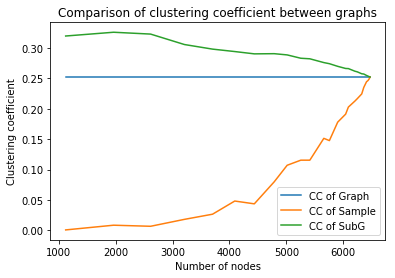

In [6]:
plt.plot(m, ccGraph, label='CC of Graph')
plt.plot(m, ccSample, label='CC of Sample')
plt.plot(m, ccSubG, label='CC of SubG')
plt.legend()
plt.title('Comparison of clustering coefficient between graphs')
plt.xlabel('Number of nodes')
plt.ylabel('Clustering coefficient')
plt.show()

# Random Walk

In [41]:
# initializing
step, ccGraph, ccSubG = [], [], []
subG = nx.Graph()
visited = set()

# Let's walk k steps
k = G.number_of_nodes() * 6

# To control the point of plotting
j = 0
checkpoint = 1000

# starting random
idNode = np.random.choice(G.nodes, 1)[0]
visited.add(idNode)

for i in range(k):
    neighbors = [n for n in G.neighbors(idNode)]
    idNode = np.random.choice(neighbors, 1)[0]
    visited.add(idNode)
    j = j + 1
    if(j == checkpoint):
        j = 0
        subG.clear()
        subG = G.subgraph(visited).copy()
        nnSubG = subG.number_of_nodes()
        step.append(i)
        ccGraph.append(cc) # clustering coefficient of entire graph G
        ccSubG.append(nx.average_clustering(subG))
        print('Number of nodes in %d steps: %d' % (i+1, nnSubG))

Number of nodes in 1000 steps: 522
Number of nodes in 2000 steps: 961
Number of nodes in 3000 steps: 1332
Number of nodes in 4000 steps: 1670
Number of nodes in 5000 steps: 1976
Number of nodes in 6000 steps: 2267
Number of nodes in 7000 steps: 2540
Number of nodes in 8000 steps: 2772
Number of nodes in 9000 steps: 2982
Number of nodes in 10000 steps: 3187
Number of nodes in 11000 steps: 3371
Number of nodes in 12000 steps: 3548
Number of nodes in 13000 steps: 3689
Number of nodes in 14000 steps: 3836
Number of nodes in 15000 steps: 3971
Number of nodes in 16000 steps: 4105
Number of nodes in 17000 steps: 4242
Number of nodes in 18000 steps: 4355
Number of nodes in 19000 steps: 4462
Number of nodes in 20000 steps: 4563
Number of nodes in 21000 steps: 4657
Number of nodes in 22000 steps: 4735
Number of nodes in 23000 steps: 4819
Number of nodes in 24000 steps: 4915
Number of nodes in 25000 steps: 4991
Number of nodes in 26000 steps: 5041
Number of nodes in 27000 steps: 5116
Number of no

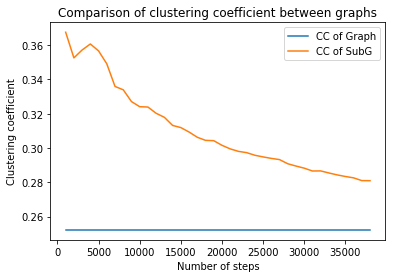

In [42]:
# plot
plt.plot(step, ccGraph, label='CC of Graph')
plt.plot(step, ccSubG, label='CC of SubG')
plt.legend()
plt.title('Comparison of clustering coefficient between graphs')
plt.xlabel('Number of steps')
plt.ylabel('Clustering coefficient')
plt.show()